In [68]:
import matplotlib.pylab as pyl
import numpy as np
import pandas as pd
import sympy as sp

In [69]:
SRC_BACKUP_EXCEL_DIR = 'E:/Diablo II Resurrected/backup/excel'
DST_EXCEL_DIR = 'E:/Diablo II Resurrected/Data/global/excel'

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [70]:
def restore_all():
    import shutil
    shutil.rmtree(DST_EXCEL_DIR)
    shutil.copytree(SRC_BACKUP_EXCEL_DIR, DST_EXCEL_DIR)

restore_all()

In [71]:
class Database:
    data: pd.DataFrame

    def __init__(self, name_of_file: str):
        self.path = f'{DST_EXCEL_DIR}/{name_of_file}.txt'
        self.data = pd.read_csv(self.path, sep="\t", dtype=object)
    
    def save(self):
        self.data.to_csv(self.path, sep='\t', mode='w', index=False)

    def get_property(self, row: int, label: str):
        return self.data.loc[row, label]

    def set_property(self, row: int, label: str, value):
        self.data.loc[row, label] = value

    def mutate_property(self, row: int, label: str, fn):
        x = self.get_property(row, label)
        self.set_property(row, label, fn(x))

In [72]:
charstats = Database('charstats')
hirelings = Database('hireling')
weapons = Database('weapons')
misc = Database('misc')
skills = Database('skills')
skilldesc = Database('skilldesc')
monstats = Database('monstats')
missiles = Database('missiles')

Character changes

In [73]:
for i in range(8):
    if i == 5:
        continue
    charstats.set_property(i, 'WalkVelocity', 13)
    charstats.set_property(i, 'RunVelocity', 15)
    charstats.set_property(i, 'ManaRegen', 20) # 20 seconds to reach full mana

charstats.set_property(1, 'ManaRegen', 25) # Sorc has warmth for a big boost, and generally the most mana.
charstats.set_property(0, 'ManaRegen', 15)

Hireling Changes

In [74]:
for i in range(120):
    new_hp = int(hirelings.get_property(i, 'HP')) * 10
    hirelings.set_property(i, 'HP', new_hp)

mask = monstats.data['AI'].str.contains('Hireable', na=False)
for i in monstats.data.loc[mask].index:
    idx = int(i)

    print(f"{idx}: {monstats.get_property(idx, 'Id')}, {monstats.get_property(idx, '*hcIdx')}")

    monstats.set_property(idx, 'Velocity', 16)
    monstats.set_property(idx, 'Run', 20)

    monstats.set_property(idx, 'threat', 12)

    monstats.set_property(idx, 'aidel', 0)
    monstats.set_property(idx, 'aidel(N)', 0)
    monstats.set_property(idx, 'aidel(H)', 0)

    monstats.set_property(idx, 'aidist', 50)
    monstats.set_property(idx, 'aidist(N)', 50)
    monstats.set_property(idx, 'aidist(H)', 50)

    monstats.set_property(idx, 'coldeffect', -50)
    monstats.set_property(idx, 'coldeffect(N)', -33)
    monstats.set_property(idx, 'coldeffect(H)', -25)
    
    monstats.mutate_property(idx, 'DamageRegen', lambda x: int(x) + 2)

271: roguehire, 271
338: act2hire, 338
359: act3hire, 359
561: act5hire1, 560
562: act5hire2, 561


Pet buffs

In [75]:
# Increase Pet defences
mask = monstats.data['AI'].str.contains('NecroPet', na=False)

# Template for values
data = {
    'Id': '',

    'aidel': 1,
    'aidel(N)': 1,
    'aidel(H)': 1,

    'Velocity': 16,
    'Run': 25,

    'Drain': 100,
    'Drain(N)': 100,
    'Drain(H)': 100,
    'DamageRegen': 10,

    'coldeffect': -50,
    'coldeffect(N)': -33,
    'coldeffect(H)': -15,

    'ResDm': 75,
    'ResMa': 75,
    'ResFi': 75,
    'ResLi': 75,
    'ResCo': 75,
    'ResPo': 75,
    'ResDm(N)': 75,
    'ResMa(N)': 75,
    'ResFi(N)': 75,
    'ResLi(N)': 75,
    'ResCo(N)': 75,
    'ResPo(N)': 75,
    'ResDm(H)': 75,
    'ResMa(H)': 75,
    'ResFi(H)': 75,
    'ResLi(H)': 75,
    'ResCo(H)': 75,
    'ResPo(H)': 75,
}

# expand data to match all rows
num_rows = monstats.data[mask].count()[0]
data = {k: [v]*num_rows for k, v in data.items()}

# Fill in the ids
data['Id'] = monstats.data.loc[mask, 'Id']

# add new data to main data, but masked
data = pd.DataFrame.from_dict(data)
monstats.data.loc[mask, data.keys()] = data

monstats.data.loc[mask, list(data.keys())]

,Id,aidel,aidel(N),aidel(H),Velocity,Run,Drain,Drain(N),Drain(H),DamageRegen,coldeffect,coldeffect(N),coldeffect(H),ResDm,ResMa,ResFi,ResLi,ResCo,ResPo,ResDm(N),ResMa(N),ResFi(N),ResLi(N),ResCo(N),ResPo(N),ResDm(H),ResMa(H),ResFi(H),ResLi(H),ResCo(H),ResPo(H)
289,claygolem,1,1,1,16,25,100,100,100,10,-50,-33,-15,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75
290,bloodgolem,1,1,1,16,25,100,100,100,10,-50,-33,-15,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75
291,irongolem,1,1,1,16,25,100,100,100,10,-50,-33,-15,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75
292,firegolem,1,1,1,16,25,100,100,100,10,-50,-33,-15,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75
357,valkyrie,1,1,1,16,25,100,100,100,10,-50,-33,-15,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75
363,necroskeleton,1,1,1,16,25,100,100,100,10,-50,-33,-15,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75
364,necromage,1,1,1,16,25,100,100,100,10,-50,-33,-15,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75
431,wolf,1,1,1,16,25,100,100,100,10,-50,-33,-15,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75
432,bear,1,1,1,16,25,100,100,100,10,-50,-33,-15,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75


In [76]:
# increase HP of skeles

fields = [
    'minHP',
    'maxHP',
    'MinHP(N)',
    'MaxHP(N)',
    'MinHP(H)',
    'MaxHP(H)',
]

# Before
display(monstats.data.loc[mask, fields])

# Convert and manipulate
monstats.data.loc[mask, fields] = monstats.data.loc[mask, fields].astype('int')
monstats.data.loc[mask, fields] *= 5

# After
monstats.data.loc[mask, fields]

,minHP,maxHP,MinHP(N),MaxHP(N),MinHP(H),MaxHP(H)
289,100,100,175,175,275,275
290,201,201,388,388,637,637
291,306,306,595,595,980,980
292,313,313,613,613,1013,1013
357,400,480,400,480,400,480
363,21,21,30,30,42,42
364,61,61,88,88,123,123
431,16,25,46,74,79,127
432,12,19,34,54,57,92


,minHP,maxHP,MinHP(N),MaxHP(N),MinHP(H),MaxHP(H)
289,500,500,875,875,1375,1375
290,1005,1005,1940,1940,3185,3185
291,1530,1530,2975,2975,4900,4900
292,1565,1565,3065,3065,5065,5065
357,2000,2400,2000,2400,2000,2400
363,105,105,150,150,210,210
364,305,305,440,440,615,615
431,80,125,230,370,395,635
432,60,95,170,270,285,460


In [77]:
# raise skeleton without corpse and enable town summon
data_fields = ['srvstfunc', 'srvdofunc', 'cltstfunc', 'cltdofunc', 'InTown']
skills.data.loc[70, data_fields] = ['', 56, '', '', 1]
skills.data.loc[80, data_fields] = ['', 56, '', 31, 1]

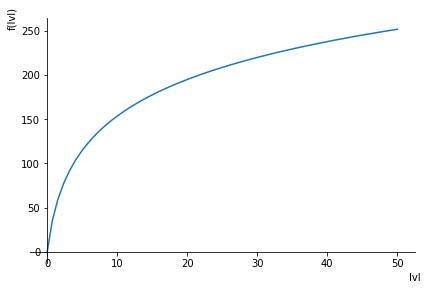

lvl*(lvl*(lvl*(lvl*(lvl*(91/1310720 - lvl/1572864) - 1733/524288) + 35483/393216) - 830341/524288) + 5386591/262144) - 70555755/524288 + 256*log(2)

'lvl*(lvl*(lvl*(lvl*(lvl*(91/1310720 - lvl/1572864) - 1733/524288) + 35483/393216) - 830341/524288) + 5386591/262144) - 70555755/524288 + 256*log(2)'

In [78]:
# [70, 80] = raise skele, raise mage

# Damage % per level
lvl = sp.Symbol('lvl')
e = sp.log(lvl+1)*64

sp.plot(e, (lvl, 0, 50))

eqtn = sp.horner(sp.series(e, x0=15, n=7).removeO())
display(eqtn)
display(str(eqtn))

In [79]:
print(skills.data.loc[70, 'aurastatcalc1'])
skills.data.loc[70, 'aurastatcalc1'] = str(eqtn)
print(skills.data.loc[70, 'aurastatcalc1'])

((lvl < 4) ? 0 : ((lvl-3)*par3))
lvl*(lvl*(lvl*(lvl*(lvl*(91/1310720 - lvl/1572864) - 1733/524288) + 35483/393216) - 830341/524288) + 5386591/262144) - 70555755/524288 + 256*log(2)


In [80]:
# frozen orb
# skills.set_property(64, 'localdelay', 10)
# skills.set_property(64, 'globaldelay', 0)

# Skill synergy; par8 = 2 aka 2%
skills.set_property(64, 'EDmgSymPerCalc', "(skill('Ice Bolt'.blvl) + skill('Cold Mastery'.blvl))*par8")

# skills.set_property(64, 'mana', 65)

skills.set_property(64, 'calc1', "ln12 * (100 + skill('Ice Bolt'.blvl) * 10 + skill('Cold Mastery'.blvl)) / 100")
skills.set_property(64, 'calc2', "ln34 * (100 + skill('Ice Bolt'.blvl) * 10 + skill('Cold Mastery'.blvl)) / 100")

In [81]:
# TP, ID books, and keys
misc.set_property(10, 'maxstack', 100)
misc.set_property(11, 'maxstack', 100)
misc.set_property(35, 'maxstack', 100)

In [82]:
# Arrows + Bolts
misc.set_property(18, 'minstack', 512)
misc.set_property(18, 'maxstack', 512)

misc.set_property(20, 'minstack', 512)
misc.set_property(20, 'maxstack', 512)

In [83]:
# Javs
weapons.set_property(47, 'minstack', 512)
weapons.set_property(47, 'maxstack', 512)

In [84]:
# infinite ammo Jav
skills.set_property(2, 'srvstfunc', '')
skills.set_property(2, 'srvdofunc', '')

skills.set_property(2, 'cltstfunc', '')
skills.set_property(2, 'cltdofunc', '')

skills.set_property(2, 'srvmissile', 'javelin')
skills.set_property(2, 'cltmissile', 'javelin')

skills.set_property(2, 'noammo', 1)

# poison jav
for idx in [15, 25, 20, 35, 24, 14]:
    if skills.get_property(idx, 'srvstfunc') == '4':
        print(skills.get_property(idx, 'skill'))
        skills.set_property(idx, 'srvstfunc', '')
        skills.set_property(idx, 'srvdofunc', '')

        skills.set_property(idx, 'cltstfunc', '')
        skills.set_property(idx, 'cltdofunc', '')

    skills.set_property(idx, 'noammo', 1)
    skills.set_property(idx, 'decquant', '')

Poison Javelin
Plague Javelin
Lightning Bolt
Lightning Fury


In [85]:
# Assassin's Quickness skill
# Param5 and Param6 = (base duration and duration/lvl)

skills.set_property(258, 'Param5', int(16.666667 * 300 * 5))
skills.set_property(258, 'Param6', 1000)

In [86]:
# Wake of Inferno buff [add physical damage and scale it off weapon by 50%]
skills.set_property(272, 'HitShift', 8) # this scales tick damage from [1 -> 8]/8

# Death Sentry Buff
skills.set_property(272, 'EDmgSymPerCalc', "(skill('Lightning Sentry'.lvl))*par8")

# increase shots
mask = skills.data['skilldesc'].str.contains('sentry', na=False)
for i in skills.data[mask]['*Id']:
    idx = int(i)
    skills.set_property(idx, 'Param1', 999)

# secondary skills that have to match the above
mask = skills.data['*Param8 Description'].str.contains('# of shots', na=False)
for i in skills.data[mask]['*Id']:
    idx = int(i)
    skills.set_property(idx, 'Param8', 999)

In [87]:
# add a move only skill
headers = {k: '' for k in skills.data.columns.values}
data = headers | {
        'skill': 'DoNothing', 
        '*Id': 365,
        'skilldesc': 'donothing', 
        'leftskill': 1, 
        'rightskill': 1, 
        'cost add': 0,
        '*eol': 0
    }

skills.data = skills.data.append(data, ignore_index=True)

headers = {k: '' for k in skilldesc.data.columns.values}
data = headers | {
        'skilldesc': 'donothing',
        'SkillPage': 0,
        'SkillRow': 0,
        'SkillColumn': 0,
        'ListRow': 0,
        'IconCel': 0,
        'str name': 'SkillNameDoNothing',
        'str short': 'SkillDescDoNothing',
        'str long': 'SkillDescDoNothing',
        'str alt': 'SkillNameDoNothing',
        '*eol': 0
    }

skilldesc.data = skilldesc.data.append(data, ignore_index=True)

for i in range(8):
    if i == 5:
        continue
    charstats.set_property(i+1, 'Skill 10', 'DoNothing')

In [88]:
# add a missile that will do the base source damage as splash
data_to_copy = {k: v for k, v in 
    zip(missiles.data.columns.values,
    missiles.data[missiles.data['Missile'].str.fullmatch('fireball')].values[0])
}

data = data_to_copy | {
        'Missile': 'meleesplash',
        '*ID': missiles.data.tail(1).index.item() + 1,

        'pCltDoFunc': 1,
        'pCltHitFunc': 1,
        'pSrvDoFunc': 1,
        'pSrvHitFunc': 1,
        'pSrvDmgFunc': '',

        'sHitPar1': 3,
        'cHitPar1': 3,
        'cHitPar2': 1,

        'EType': '',

        'MissileSkill': 1,
        'InitSteps': 0,
        'Skill': 'Attack',
        'Range': 25,

        'ExplosionMissile': '',
        'CltHitSubMissile1': '',

        'TravelSound': '',
        'HitSound': '',
    }

missiles.data = missiles.data.append(data, ignore_index=True)

# add the last missile to attack
skills.data.loc[0, ['srvmissile', 'cltmissilea']] = 'meleesplash'

In [89]:
# Add a skill to Rogue
# 'Skill3','Mode3','Chance3','ChancePerLvl3','Level3','LvlPerLvl3'

headers = ['Skill3','Mode3','Chance3','ChancePerLvl3','Level3','LvlPerLvl3']
data = ['Decrepify', 4, 50, 8, 1, 1]

scouts = hirelings.data['Hireling'].str.fullmatch('Rogue Scout')
hirelings.data.loc[scouts, headers] = data

In [90]:
# Rebalance 'probabilities'?
headers = [f'Chance{i}' for i in range(1,7)]
df: pd.DataFrame = hirelings.data[headers]

In [91]:
charstats.save()
hirelings.save()
weapons.save()
misc.save()
skills.save()
skilldesc.save()
monstats.save()
missiles.save()